This is my data visualization and exploration information
for data visualzation:
1. Group tweets by country if there is one
    - we can do this by using a list of constants that is every country in the world
    - Make sure to use states and abbreviations
2. Map hour of the day to retweet count
    - time zone isn't specified. Probaby U.T.C. which will be kind of wack
    - maybe this should go in the data exploration section
Correlation: Retweets
    - this is important because of poplaurity. Political campaign managers will want to know how to reach people
    1. Location/Country to retweet count
    2. hour to retweet count
    3. Keyword of top 100 words and retweet count - stop words - this is a big one
        - this is possible by getting means of words and how often they appear in a tweet vs retweet count
        - we can do this to a twitter uses description as well
        - we can also look at created at to see if accounts are established or not
            - we don't have follower numbers but we can assume older accounts probably have more followers
        - We can look at this difference between keywords and set differences between likes and retweets
            - retweets have more weight so we can see words that cause lots of likes but not a lot of retweets
                - This is calculated by percentages of likes vs retweets for anything that has over 10 likes/retweets

# Australian Election Tweets

Lab One: Exploring Table Data

##### Riley Bates, Chandler Choate, Hayden Donofrio

## Section 1: Business Understanding

Today there is quite a bit of interest in tweets related to elections, especially after the 2016 U.S. Presidential Election. The [Australian Election 2019 Tweets](https://www.kaggle.com/taniaj/australian-election-2019-tweets/version/2) data explores this election and includes many interesting attributes, including the user's location and the number of retweets and favorites that the tweet received. 

This dataset includes free text, nominal and ordinal data, and includes over 180,000 tweets that were collected between May 10, 2019 and May 20, 2019.

Any insights gleaned from this dataset would be very important to Australian politicians and campaign managers, and may help them target specific audiences and address various issues or topics. For example, are most of individuals tweeting about the Australian election living in Australia, or are there plenty of people who will not impact the election causing noise on Twitter and weighing in? Which areas of Australia tend to be conservative versus liberal, and which areas seem to be more opiniated? 

By exploring the features in this dataset, we will be able to find interesting relationships that may or may not be self-evident. Further analysis and visualization will be directly beneficial to Australian campaign managers in their decision-making process. To be useful to individuals involved in the campaign, however, there would have to be evident trends in the data. If political opinions and popularity are simply randomly related to geographical area, or there is no clear pattern, then this information will be of no use to managers.

Question to explore: Which parts of the world in addition to Australia are concerned about the Australian election?

## Section 2: Data Understanding

In [53]:
import pandas as pd
import numpy as np

df = pd.read_csv('australian-election-2019-tweets/auspol2019.csv')
print(df.describe())
df.head()

       retweet_count  favorite_count       user_id
count  183370.000000   183370.000000  1.833700e+05
mean        3.814310       11.159006  1.846078e+17
std        37.727466      118.324495  3.789751e+17
min         0.000000        0.000000  2.200000e+01
25%         0.000000        0.000000  1.002494e+08
50%         0.000000        1.000000  4.854974e+08
75%         1.000000        3.000000  2.981410e+09
max      6622.000000    15559.000000  1.130347e+18


,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
0,2019-05-20 09:13:44,1130401208756187136,After the climate election: shellshocked green...,0.0,0.0,9.248486e+07,PIPELINEPETE,jocksjig,Retired Tradesman and Progressive Anti Conserv...,"Brisbane, Queensland",2009-11-25 09:19:45
1,2019-05-20 09:13:43,1130401205367140357,@narendramodi @smritiirani Coverage of indian ...,0.0,0.0,7.756474e+08,Narinder Parmar,nparmar1957,"Life coach & trainer, Motivational speaker, Ma...","Wollongong, NSW, AUSTRALIA",2012-08-23 10:20:40
2,2019-05-20 09:13:33,1130401162782371841,@workmanalice Do you know if Facebook is relea...,0.0,0.0,5.687300e+04,Peter Wells,peterwells,Writes for @theage and @smh on technology and ...,Melbourne,2006-12-11 07:38:06
3,2019-05-20 09:13:29,1130401143551434753,@vanbadham We all understand we have a compuls...,0.0,0.0,9.081660e+17,The Realist,therealist822,"Calls it as I see it. Anti PC, SJW and VS. If ...",NaN,2017-09-14 03:10:30
4,2019-05-20 09:13:23,1130401118666809345,"Shares were mixed in Asia, with India and Aust...",0.0,0.0,5.260074e+08,Inquirer Business,InquirerBiz,The official Twitter account of the Inquirer G...,Philippines,2012-03-16 03:51:59


The most important attributes in the dataset for initial triage will be retweet_count, favorite_count, and user_location. The number of retweets and favorites will be a good indicator on how popular a tweet was. These features can then be mapped to the user's location to determine if there is any correlation there.

Once we begin text analysis, then we can begin parsing through the full_text field, which is the actual text of the tweet, and user_description, which is the user's Twitter bio. At this point, the relationship between number of retweets and specific words and phrases can be examined. Perhaps it is the case that when someone tweets similar words or phrases, they receive more retweets. This will be a very important relationship to examine further.

The created_at attribute is very interesting and could be potentially helpful. This attribute is the date and time of tweet creation, although it would have more significance if the entire dataset was not collected over a 10 day period. However, perhaps there is some relationship between the popularity of a tweet (retweet_count) and when it was created; for example, a tweet sent closer to the election may have seen more popularity.

In [83]:
print(df.dtypes)
print('=======================================')
print(df.info())

created_at          datetime64[ns]
id                         float64
full_text                   object
retweet_count              float64
favorite_count             float64
user_id                    float64
user_name                   object
user_screen_name            object
user_description            object
user_location               object
user_created_at     datetime64[ns]
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183336 entries, 0 to 183378
Data columns (total 11 columns):
created_at          183336 non-null datetime64[ns]
id                  183336 non-null float64
full_text           183336 non-null object
retweet_count       183336 non-null float64
favorite_count      183336 non-null float64
user_id             183336 non-null float64
user_name           183324 non-null object
user_screen_name    183336 non-null object
user_description    183336 non-null object
user_location       146451 non-null object
user_created_at     183327 non-null datetime64[n

### Data Cleaning

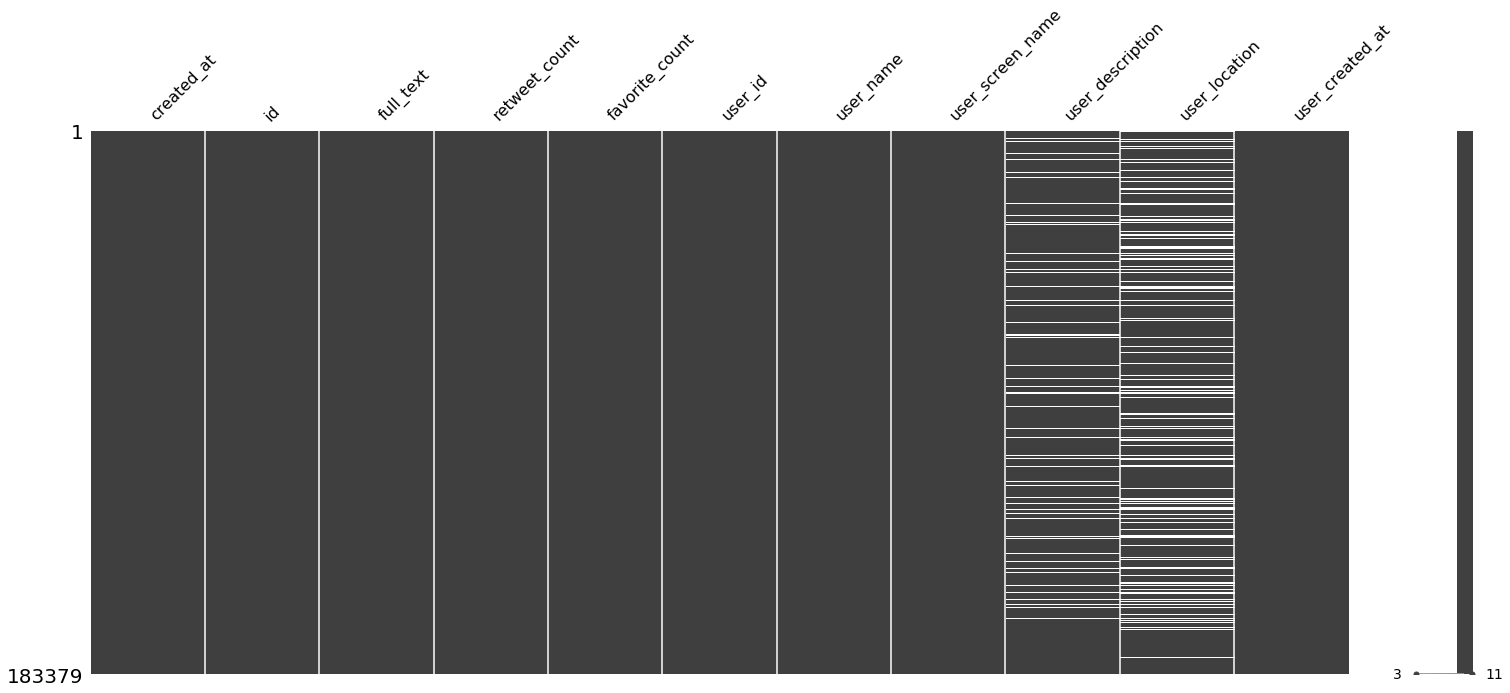

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df.sort_values(by=["retweet_count","favorite_count"]))

The graphic above visualizes the missing data in our twitter dataset. It is very evident that only two attributes have any missing data: user_description and user_location. This is probably because a user is not required to fill out their description and can opt out of location tracking services. All other fields are required for either a user, or a tweet, to be created, and the id and created_at fields are generated automatically by Twitter.

This is slightly troublesome, because user_location is one of the attributes that we were hoping to use. Since it is not really possible to impute someone's description of themselves, we will be forced to ignore these entries. It is not advisable to attempt to impute user_location either, since grouping other attributes of the dataset that are similar does not help us. Many different people live in the same location, so the diversity of a city or location's population prevents imputed data. Hence, dropping this missing data will probably be the best idea. 

Timestamp('2006-03-21 21:04:12')

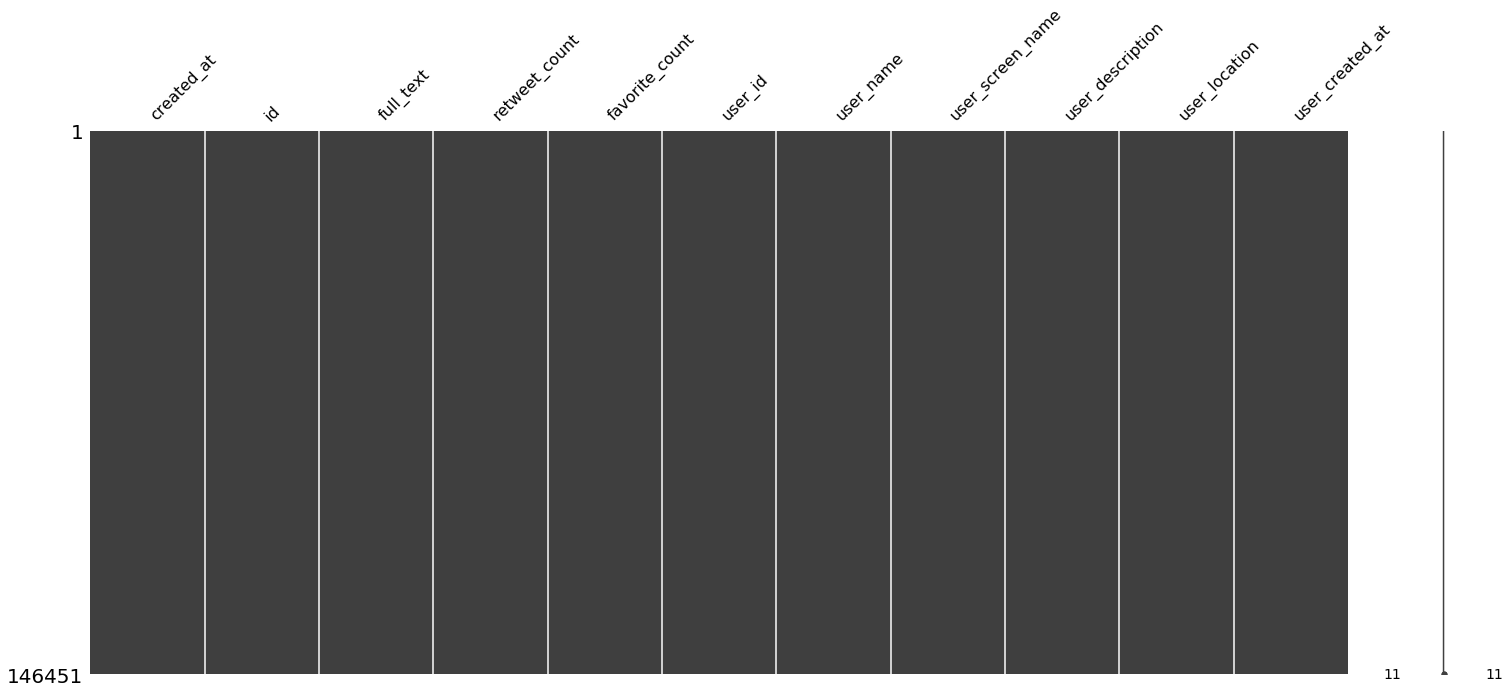

In [84]:
# Drop rows with missing values
df.dropna(inplace=True)
mn.matrix(df.sort_values(by=["retweet_count","favorite_count"]))

# Force all invalid datetimes and ids to be of the correct type
df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")
df["id"] = pd.to_numeric(df["id"], errors="coerce")
df["retweet_count"] = pd.to_numeric(df["retweet_count"], errors="coerce")
df["user_created_at"] = pd.to_datetime(df["user_created_at"], errors="coerce")
df["user_created_at"].min()

In [57]:
# describe each data type and its contents
desc = pd.DataFrame()
desc["Column"] = df.columns

desc["Description"] = [
    "Date on which the tweet was posted",
    "ID of the tweet",
    "Full tweet text",
    "Number of retweets",
    "Number of likes",
    "User ID of user who posted the tweet",
    "Username of user who posted the tweet",
    "Screen name of user who posted the tweet",
    "Free text description on profile of user who posted the tweet",
    "Free text location on profile of user who posted the tweet",
    "Date of create of account of user who posted the tweet"
]
#date is ordinal

desc["Scales"] = ['ordinal'] + ['nominal'] + ['ordinal'] + ['ratio'] * 2 + ['nominal'] *5 + ['ordinal'] 
#find out ranges
#there are some dates that aren't date ranges
#todo: Before coercing this values we should see everything that we have (or maybe after for seeing if it is a lot)

desc["Ranges"] = [
    "{} - {}".format(df['created_at'].min(), df['created_at'].max()),
    "{} - {}".format(df['id'].min(),df['id'].max()),
    "N/A",
    "0 - {}".format(df['retweet_count'].max()),
    "0 - {}".format(df['favorite_count'].max()),
    "N/A",
    "N/A",
    "N/A",
    "N/A",
    "N/A",
    "{} - {}".format(df["user_created_at"].min(), df["user_created_at"].max())
]
desc

,Column,Description,Scales,Ranges
0,created_at,Date on which the tweet was posted,ordinal,2019-05-10 16:58:15 - 2019-05-20 11:40:07
1,id,ID of the tweet,nominal,1.1268942292071711e+18 - 1.1304380453106729e+18
2,full_text,Full tweet text,ordinal,N/A
3,retweet_count,Number of retweets,ratio,0 - 6622.0
4,favorite_count,Number of likes,ratio,0 - 15559.0
5,user_id,User ID of user who posted the tweet,nominal,N/A
6,user_name,Username of user who posted the tweet,nominal,N/A
7,user_screen_name,Screen name of user who posted the tweet,nominal,N/A
8,user_description,Free text description on profile of user who p...,nominal,N/A
9,user_location,Free text location on profile of user who post...,nominal,N/A


In [58]:
# Find the duplicate instances and drop these rows
print(len(df))
df.drop_duplicates(subset ="id", 
                     keep = False, inplace = True) 
print(len(df))

183379
183336


## Section 3: Data Visualization
We're mainly going to be exploring retweets and likes. We'll assume that the timezone is UTC since datetime is not specified.
Check https://developer.twitter.com/en/docs/ads/general/guides/timezones.html for proof that twitter stores in UTC.
 were going to
 1. gather data with created at tweet date and retweet count and like count
  - group by day for each
  - Take the day with the most retweets and do a group by hour on that time
 2. then we are going to look at account created at retweet count and like count
   - we can do a group by year here



In [59]:
#df.groupby(by=[df.created_at.month, df.created_at.year])
#turn these into graphs
import plotly.graph_objs as go
import plotly.express as px
tips = px.data.tips()
groups = df.set_index('created_at').groupby(pd.Grouper(freq='D')).mean()
strs = [pd.to_datetime(i).strftime("%B %d, %Y") for i in groups.index.values]
fig = go.Figure(data = [
    go.Bar(
        name='Retweets',
        x= strs, # assign x as the dataframe column 'x'
        y=groups['retweet_count']
    ),
    go.Bar(
        name='Likes',
        x=strs, # assign x as the dataframe column 'x'
        y=groups['favorite_count']
    )
])
fig.update_layout(barmode='stack')
fig.show()

In [60]:
groups = df.query('created_at >= "May 11 00:00:00 2019" & created_at <= "May 11 23:59:59 2019"').set_index('created_at').groupby(pd.Grouper(freq='H')).count()
#might want to do this for the 11th We dont have a full set for the 10th. SHOW THIS IN THE PREVIOUS SECTION


In [61]:
#i picked this day since it was the "FULL DAY" with  the highest retweet count
#this section shows which hours UTC have the highest mean retweet count
#we can see that it is at 1 AM UTC which is between  9 AM and 11 AM in Australia depending on Time Zone. (NO DST)
#11AM based on the time in Sydney
#NOTE WE MIGHT WANT TO NORMALIZE THIS
df.query('created_at >= "May 11 00:00:00 2019" & created_at <= "May 11 23:59:59 2019"').set_index('created_at').groupby(pd.Grouper(freq='H')).mean()

strs = [pd.to_datetime(i).strftime("%H") for i in groups.index.values]
fig = go.Figure(data = [
    go.Bar(
        name='Retweets',
        x= strs, # assign x as the dataframe column 'x'
        y=groups['retweet_count']
    ),
    go.Bar(
        name='Likes',
        x=strs, # assign x as the dataframe column 'x'
        y=groups['favorite_count']
    )
])
fig.update_layout(barmode='stack', title="Likes/Retweets per hour on May 11th")
fig.show()

In [62]:
#now group by year for created at
#NOTE: WE MIGHT WANT TO NORMALIZE THIS
groups = df.set_index('user_created_at').groupby(pd.Grouper(freq='Y')).count()
strs = [pd.to_datetime(i).strftime("%Y") for i in groups.index.values]

fig = go.Figure(data = [
    go.Bar(
        name='Retweets',
        x= strs, # assign x as the dataframe column 'x'
        y=groups['retweet_count']
    ),
    go.Bar(
        name='Likes',
        x=strs, # assign x as the dataframe column 'x'
        y=groups['favorite_count']
    )
])
fig.update_layout(barmode='stack', title="Total Likes/Retweets Based on user created at")
fig.show()

In [63]:
groups = df.set_index('user_created_at').groupby(pd.Grouper(freq='Y')).mean()
strs = [pd.to_datetime(i).strftime("%Y") for i in groups.index.values]

fig = go.Figure(data = [
    go.Bar(
        name='Retweets',
        x= strs, # assign x as the dataframe column 'x'
        y=groups['retweet_count']
    ),
    go.Bar(
        name='Likes',
        x=strs, # assign x as the dataframe column 'x'
        y=groups['favorite_count']
    )
])
fig.update_layout(barmode='stack', title="Average per year Likes/Retweets Based on user created at")
fig.show()

In [64]:
df['full_text'][0]

'After the climate election: shellshocked green groups remain resolute https://t.co/wyJzmAcyiD'

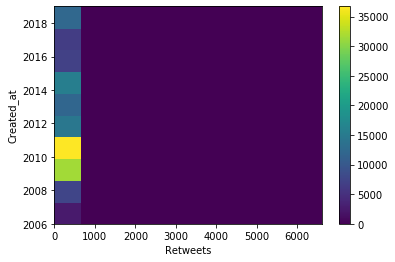

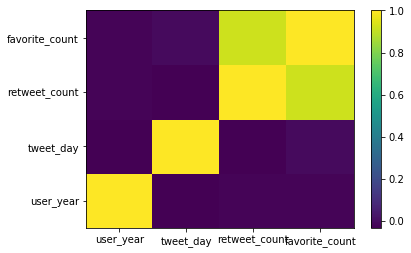

In [114]:
# groups = df.set_index('created_at').groupby(pd.Grouper(freq='D')).mean()
df['created_at'] = pd.to_datetime(df['created_at'])
df['user_year'] = df['user_created_at'].dt.year
df['tweet_day'] = df['created_at'].dt.day
df

# plot the correlation matrix     
plt.hist2d(x=df.retweet_count, y=df.user_year)
plt.colorbar()
plt.xlabel("Retweets")
plt.ylabel("Created_at")
plt.show()

# plot the correlation matrix 
vars_to_use = ['user_year', 'tweet_day', 'retweet_count', 'favorite_count'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)

plt.colorbar()
plt.show()

In [ ]:
#now we are going to do text data on the tweet regarding the words and which words seem to get the most retweets 
#we will need to stem every word in every tweet and remove special characters 
#we will also remove stop words as well
import nltk
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english')
#applying stop words... this may take a while
df['full_text'] = df['full_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#above line takes too fucking long! just remove the stop words from the matrix after we have our bag of words

In [66]:
#stemming words... this is going to take a while
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()

#This code was taken from this very smart stackoverflow answer 
#https://stackoverflow.com/questions/43795310/apply-porters-stemmer-to-a-pandas-column-for-each-word
def stem_shorten(sentence):
    words = sentence.split()
    stemmed_tokens = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_tokens)

df['full_text'] = df['full_text'].apply(stem_shorten)
(df['full_text'][0])

'after climat election: shellshock green group remain resolut https://t.co/wyjzmacyid'

In [67]:
print(df['full_text'][11877])

australia decides: prime minist @scottmorrisonmp declar victori 2019 feder election. https://t.co/dsgfbimyw #ausvot #7new https://t.co/2ovamroiyu


In [68]:
import re
def regex(sentence):
    return re.sub(r'[^a-zA-Z#]', ' ', sentence)
#df['team'] =  df['team'].apply(lambda x: re.sub(r'[\n\r]*','', str(x)))
#this removes all special characters from every tweet
df['full_text'] = df['full_text'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', str(x)))
df['full_text'][0]

'after climat election  shellshock green group remain resolut https   t co wyjzmacyid'

In [69]:
#now that we have all of our stemming and regex applied, we can get our bag of words and our tf idf for retweets
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
#we should show this normalized and not normalized
#not sure how to do this correlation between text data and table data in one line
#so heres a hash that gets a word and adds its score from the retweet count
word_scores = {}
index = 0
for col in df['full_text']:
    for word in col.split():
        if word in word_scores:
            try:
                score = df['retweet_count'][index]
                word_scores[word] += score
            except:
                break
        else:
            score =  df['retweet_count'][index]
            word_scores[word] = score
    index += 1
    #now divide by the number of rows
word_scores.update((x, y/len(df.index)) for x, y in word_scores.items())
#get the highest words
    

In [70]:
import operator
#MAYBE WE CAN USE A SWARM PLOT HERE?
sorted_d = sorted(word_scores.items(), key=operator.itemgetter(1), reverse=True)
#now we are displaying as bar graph
#we might want to use subplots for each 4 plots
import plotly.express as px
print(px.data.gapminder().query("country == 'Canada'").__class__.__name__)
#data_canada = px.data.gapminder().query("country == 'Canada'")
dfObj = pd.DataFrame(sorted_d[:100], columns = ['word' , 'score']) 
fig = px.bar(dfObj, x='word', y='score')
fig.show()
#rerun for stop words

DataFrame


In [71]:
#now normalize the data by the amount of words in each tweet
word_scores = {}
index = 0
for col in df['full_text']:
    num_words = float(len(col.split()))
    for word in col.split():
        if word in word_scores:
            try:
                score = df['retweet_count'][index]
                word_scores[word] += (score / num_words)
            except:
                break
        else:
            score =  df['retweet_count'][index]
            word_scores[word] = (score / num_words)
    index += 1
    #now divide by the number of rows
word_scores.update((x, y/len(df.index)) for x, y in word_scores.items())

In [72]:
sorted_d = sorted(word_scores.items(), key=operator.itemgetter(1), reverse=True)
dfObj = pd.DataFrame(sorted_d[:100], columns = ['word' , 'score']) 
fig = px.bar(dfObj, x='word', y='score')
fig.show()

In [73]:
# this will stem and shorten every word in user description
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english')
#applying stop words... this may take a while
df['user_description'] = df['user_description'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rbates/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:

df['user_description'] = df['user_description'].apply(stem_shorten)
(df['user_description'][0])

'retir tradesman progress anti conservative! musician.'

In [75]:
df['user_description'] = df['user_description'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', str(x)))
df['user_description'][0]

'retir tradesman progress anti conservative  musician '

In [76]:
#now this section if for getting tfidf scores 
#WRITING THIS NOW SHOULD WE INCLUDE HASHTAGS?
#SCREW THE TFIDF This is about descriptions because tfidf does not seem super helpful compared to the last plot
word_scores = {}
index = 0
for col in df['user_description']:
    for word in str(col).split():
        if word in word_scores:
            try:
                score = df['retweet_count'][index]
                word_scores[word] += score
            except:
                break
        else:
            score =  df['retweet_count'][index]
            word_scores[word] = score
    index += 1
    #now divide by the number of rows
word_scores.update((x, y/len(df.index)) for x, y in word_scores.items())

In [77]:
sorted_d = sorted(word_scores.items(), key=operator.itemgetter(1), reverse=True)
dfObj = pd.DataFrame(sorted_d[:100], columns = ['word' , 'score']) 
fig = px.bar(dfObj, x='word', y='score')
fig.show()

In [78]:
# now normalized
word_scores = {}
index = 0
for col in df['user_description']:
    num_words = float(len(col.split()))
    for word in str(col).split():
        if word in word_scores:
            try:
                score = df['retweet_count'][index]
                word_scores[word] += (score / num_words)
            except:
                break
        else:
            score =  df['retweet_count'][index]
            word_scores[word] = (score / num_words)
    index += 1
    #now divide by the number of rows
word_scores.update((x, y/len(df.index)) for x, y in word_scores.items())

In [79]:
sorted_d = sorted(word_scores.items(), key=operator.itemgetter(1), reverse=True)
dfObj = pd.DataFrame(sorted_d[:100], columns = ['word' , 'score']) 
fig = px.bar(dfObj, x='word', y='score')
fig.show()

## Section 4: Additional Analysis

In [80]:
#now in this section we will explore correlations between location